<a href="https://colab.research.google.com/github/rodsei/pattern-recognition/blob/main/Reconhecimento_de_padr%C3%B5es_Semana_3_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade da Semana 3

Em um jupyter notebook:

1. Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

2. Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

3. Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

4. Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. 
  - Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.
  - Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. 
  - Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.
  - O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.


Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).

### Download da base de dados: Immunotherapy

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx

--2020-11-16 00:36:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33796 (33K) [application/x-httpd-php]
Saving to: ‘Immunotherapy.xlsx’

Immunotherapy.xlsx  100%[===================>]  33.00K  --.-KB/s    in 0.03s   

2020-11-16 00:36:42 (1.02 MB/s) - ‘Immunotherapy.xlsx’ saved [33796/33796]



In [ ]:
import pandas as pd
import numpy as np

full_database = pd.read_excel("Immunotherapy.xlsx",usecols="A:H")

full_database.keys()

Index(['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area',
       'induration_diameter', 'Result_of_Treatment'],
      dtype='object')

In [ ]:
full_database

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0


In [ ]:
X = np.array(full_database.drop(["Result_of_Treatment"], axis=1))
y = np.array(full_database["Result_of_Treatment"].values)

X.shape, y.shape

((90, 7), (90,))

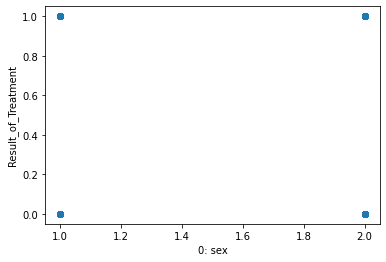

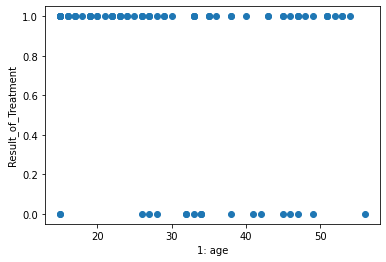

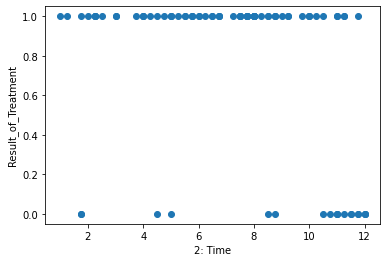

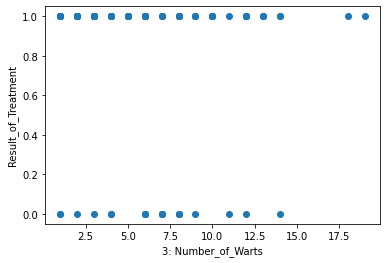

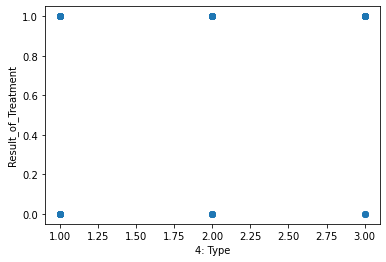

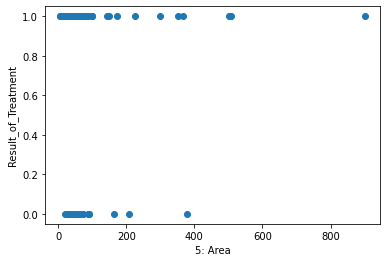

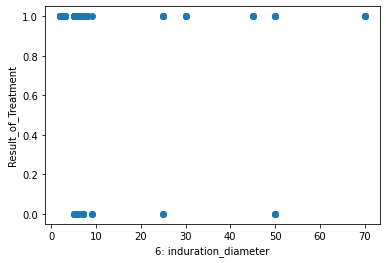

In [ ]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
  plt.xlabel(f"{i}: {full_database.keys()[i]}")
  plt.ylabel("Result_of_Treatment")
  plt.scatter(X[:,i], y)
  plt.show()

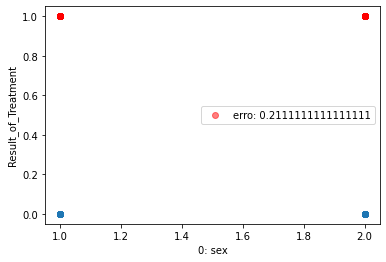

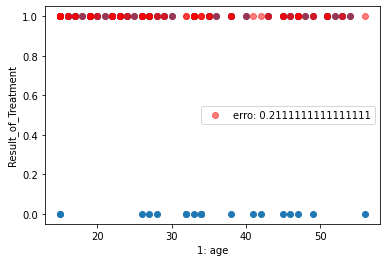

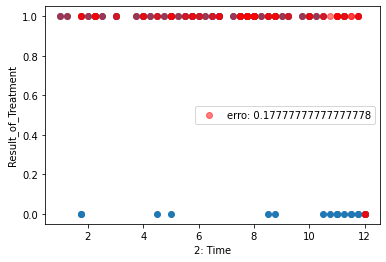

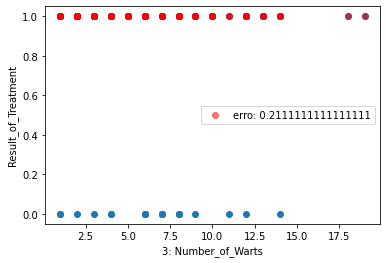

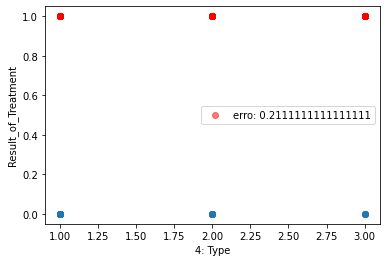

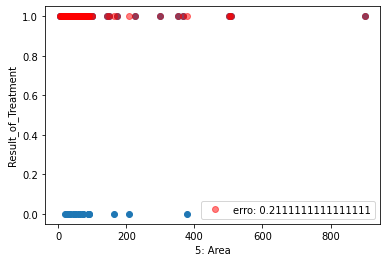

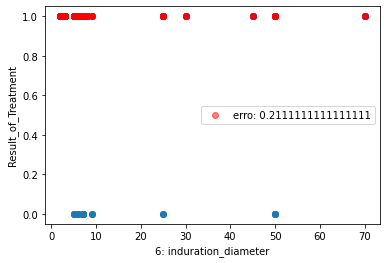

In [ ]:
# CALCULANDO O MSE PARA O TREINAMENTO EM CADA FEATURE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

for i in range(X.shape[1]):
  modelo = LogisticRegression()
  X_i = X[:,i:i+1]
  modelo.fit(X_i, y)
  ypred = modelo.predict(X_i)
  erro = mean_squared_error(y, ypred)

  plt.xlabel(F"{i}: {full_database.keys()[i]}")
  plt.ylabel("Result_of_Treatment")
  plt.scatter(X_i, y)
  plt.plot(X_i, ypred, 'ro', label=f"erro: {erro}", alpha=0.5)
  plt.legend() 
  plt.show()

MSE: 0.14444444444444443
Coef: [ 7.76151818e-02 -2.78419179e-02 -3.48213370e-01 -1.58117168e-02
 -3.04417605e-04  7.09364880e-04 -1.22500582e-02]
Deltas: [0.5 1.  2. ]


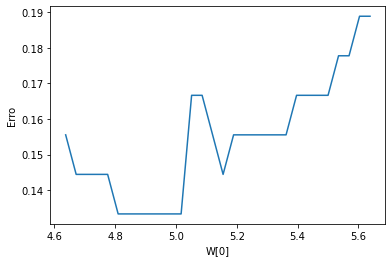

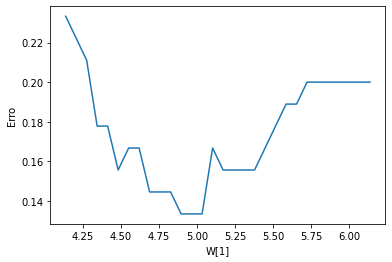

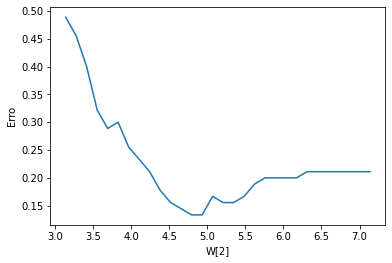

In [ ]:
# CALCULANDO O MSE PARA O TREINAMENTO COM A BASE COMPLETA - VARIANDO O INTERCEPT_
modelo = LogisticRegression(max_iter=500) 
modelo.fit(X, y)
ypred = modelo.predict(X)
erro = mean_squared_error(y, ypred)
intercept = modelo.intercept_
coef = modelo.coef_[0]
print("MSE:", erro)

print("Coef:", coef)

delta = np.empty(3)

delta[0] = 0.5
delta[1] = 1
delta[2] = 2

print("Deltas:", delta)

for i in range(0,3):
  erros = []
  ws = np.linspace(intercept-delta[i], intercept+delta[i], 30)
  for w in ws:
    # Atualiza o valor de treinamento com a variação do intercept
    modelo.intercept_ = w

    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  
  # Volta com o valor original do modelo treinado
  modelo.intercept_ = intercept   
  
  plt.ylabel("Erro")
  plt.xlabel(f"W[{i}]")
  plt.plot(ws,erros)
  plt.show()